In [1]:
import anndata as ad
import scanpy as sc
import pandas as pd
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


## make adata

In [2]:
gene_df = pd.read_csv('lung_geneNames_upload.csv', index_col=0, header=None)
meta_df = pd.read_csv('lung_metaData.txt', sep='\t', index_col=0, skiprows=[1])

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
%%time
data = ad.read_mtx('gene_sorted-lung_expression_data.mtx.gz')

CPU times: user 4min 16s, sys: 37.1 s, total: 4min 53s
Wall time: 4min 55s


(The metadata annotation is missing a single cell, and I'm guessing from the beginning because this is how the annotations make sense.)

In [4]:
adata = ad.AnnData(X=data.T[1:].X, obs=meta_df, var=gene_df)
adata.obsm['X_umap'] = pd.read_csv('lung_clusterfile.txt', sep='\t', index_col=0, skiprows=[1]).values

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'biosample_id' as categorical
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'donor_id' as categorical
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and 

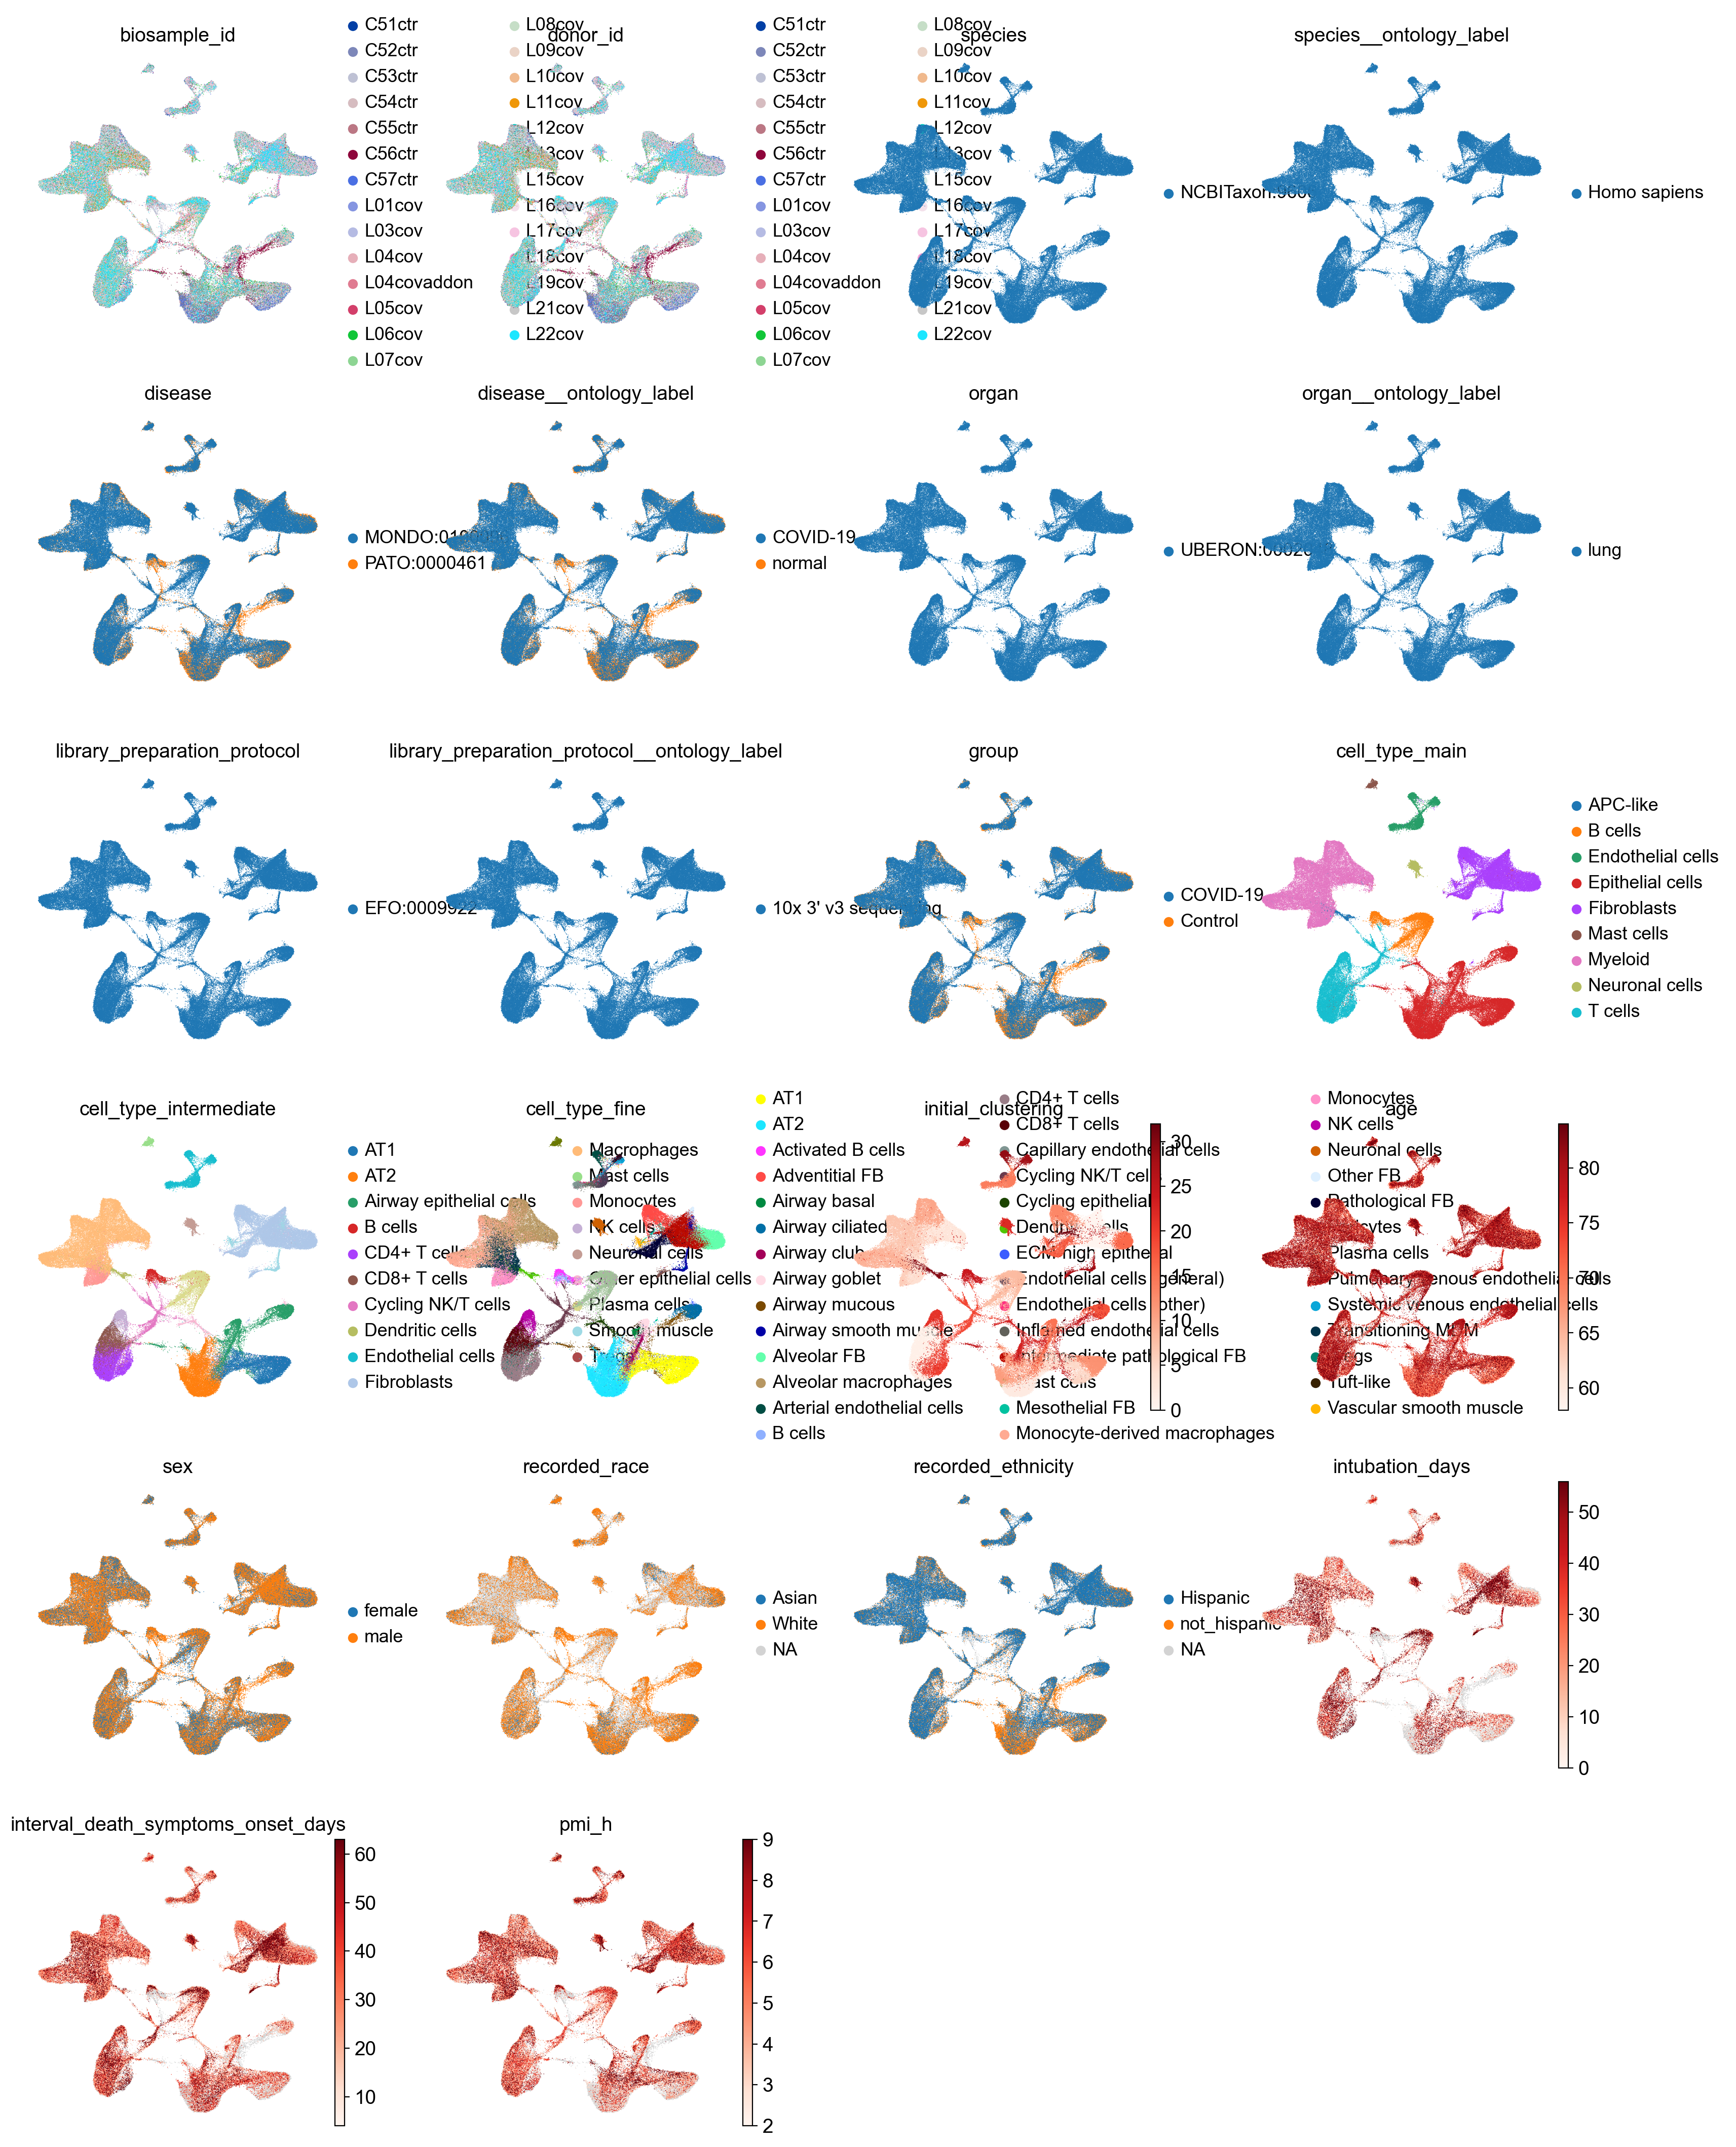

In [5]:
sc.pl.umap(adata, color=adata.obs.columns)

## processing

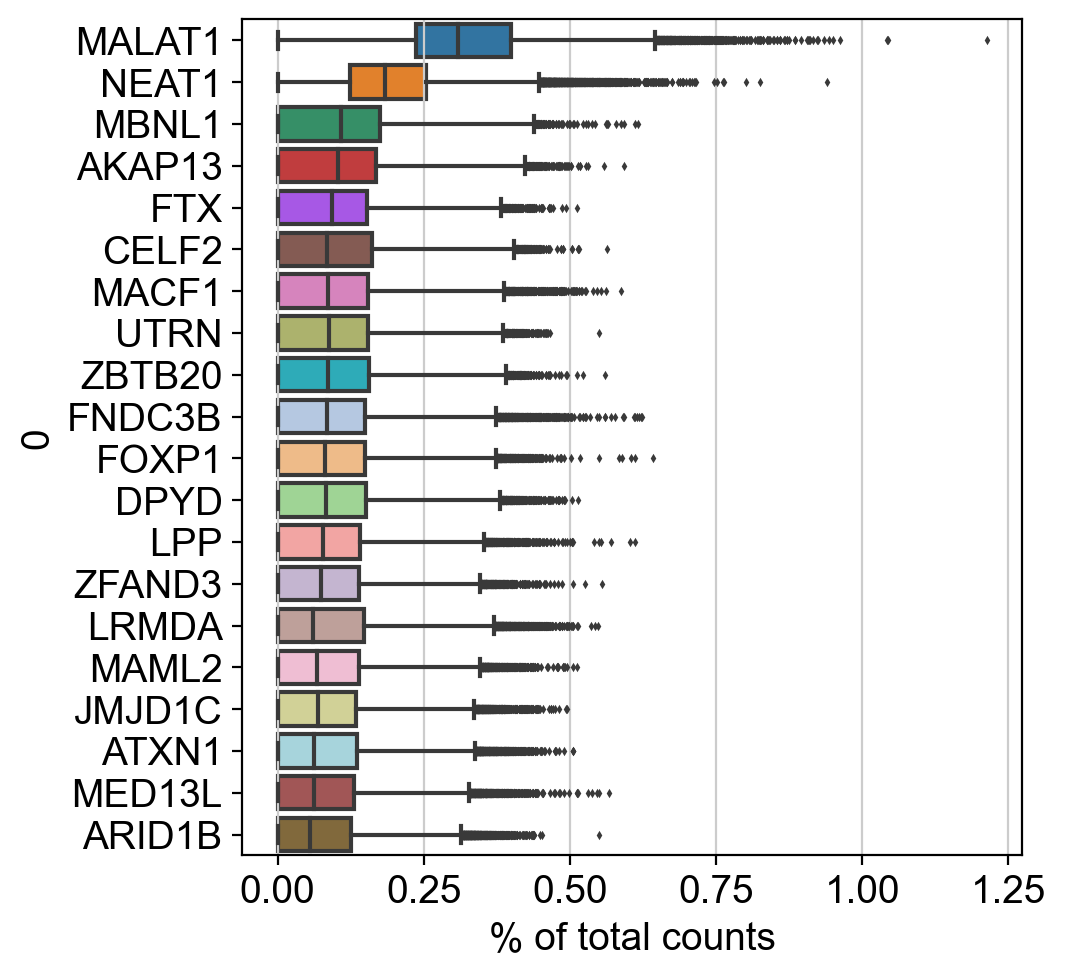

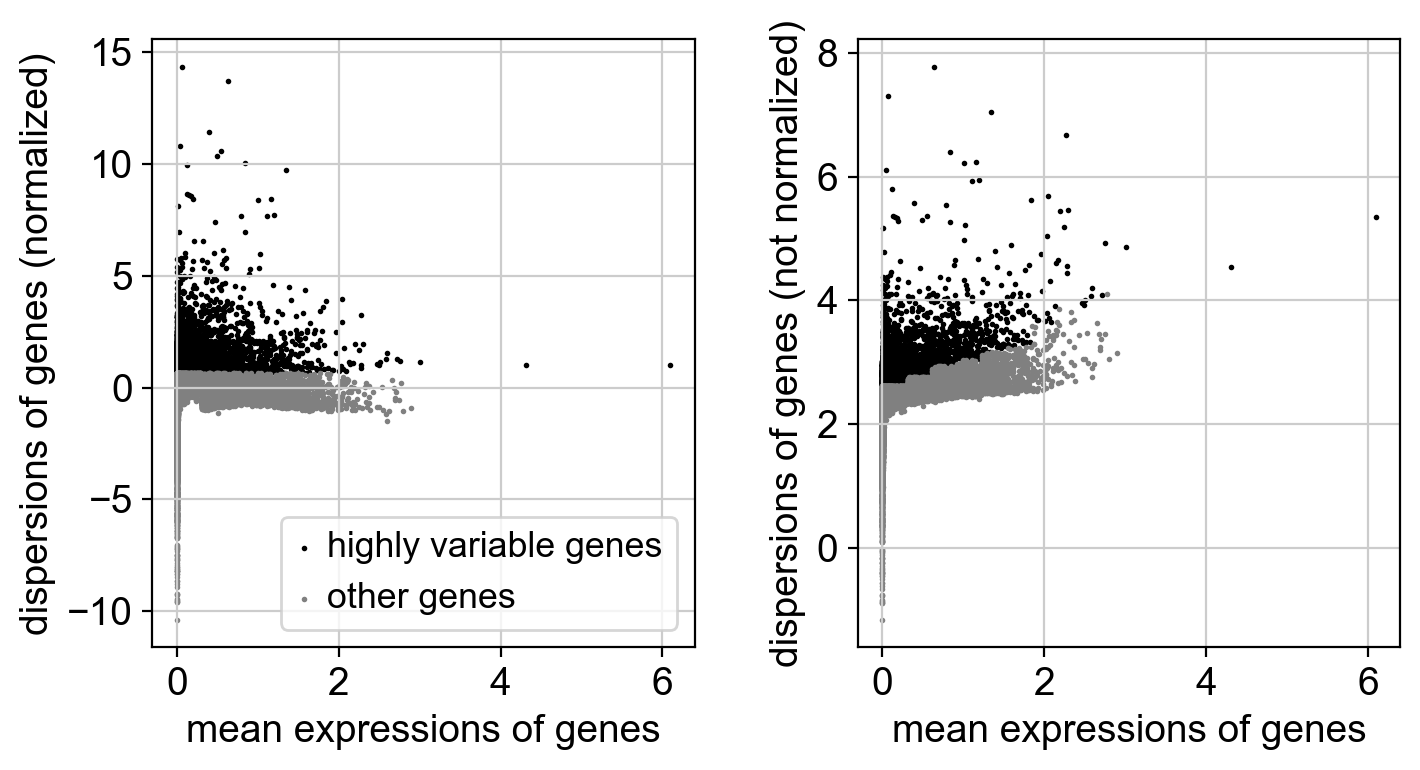

2022-02-18 00:08:42.369140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-18 00:08:42.369378: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.highly_variable_genes(adata, n_top_genes=5000, subset=False)
sc.pl.highly_variable_genes(adata)

# pre-compute plots
sc.tl.pca(adata, use_highly_variable=True)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

In [19]:
adata.var.index.name = 'gene'

In [20]:
adata.write('Melms_2021.h5ad')
adata

AnnData object with n_obs × n_vars = 116313 × 34546
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'group', 'cell_type_main', 'cell_type_intermediate', 'cell_type_fine', 'initial_clustering', 'age', 'sex', 'recorded_race', 'recorded_ethnicity', 'intubation_days', 'interval_death_symptoms_onset_days', 'pmi_h', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'biosample_id_colors', 'donor_id_colors', 'species_colors', 'species__ontology_label_colors', 'disease_colors', 'disease__ontology_label_colors', 'organ_colors', 'organ__ontology_label_colors', 'library_preparation_protocol_colors', 'library_preparation_protocol__ontology_label_colors', 'group_colors', 'cell_type_main_colors', 'cell_type_intermediate_colors', 'cell_type_fine_colors', 'sex_colors', 'recorded_race_colo

## check for epithelial cells

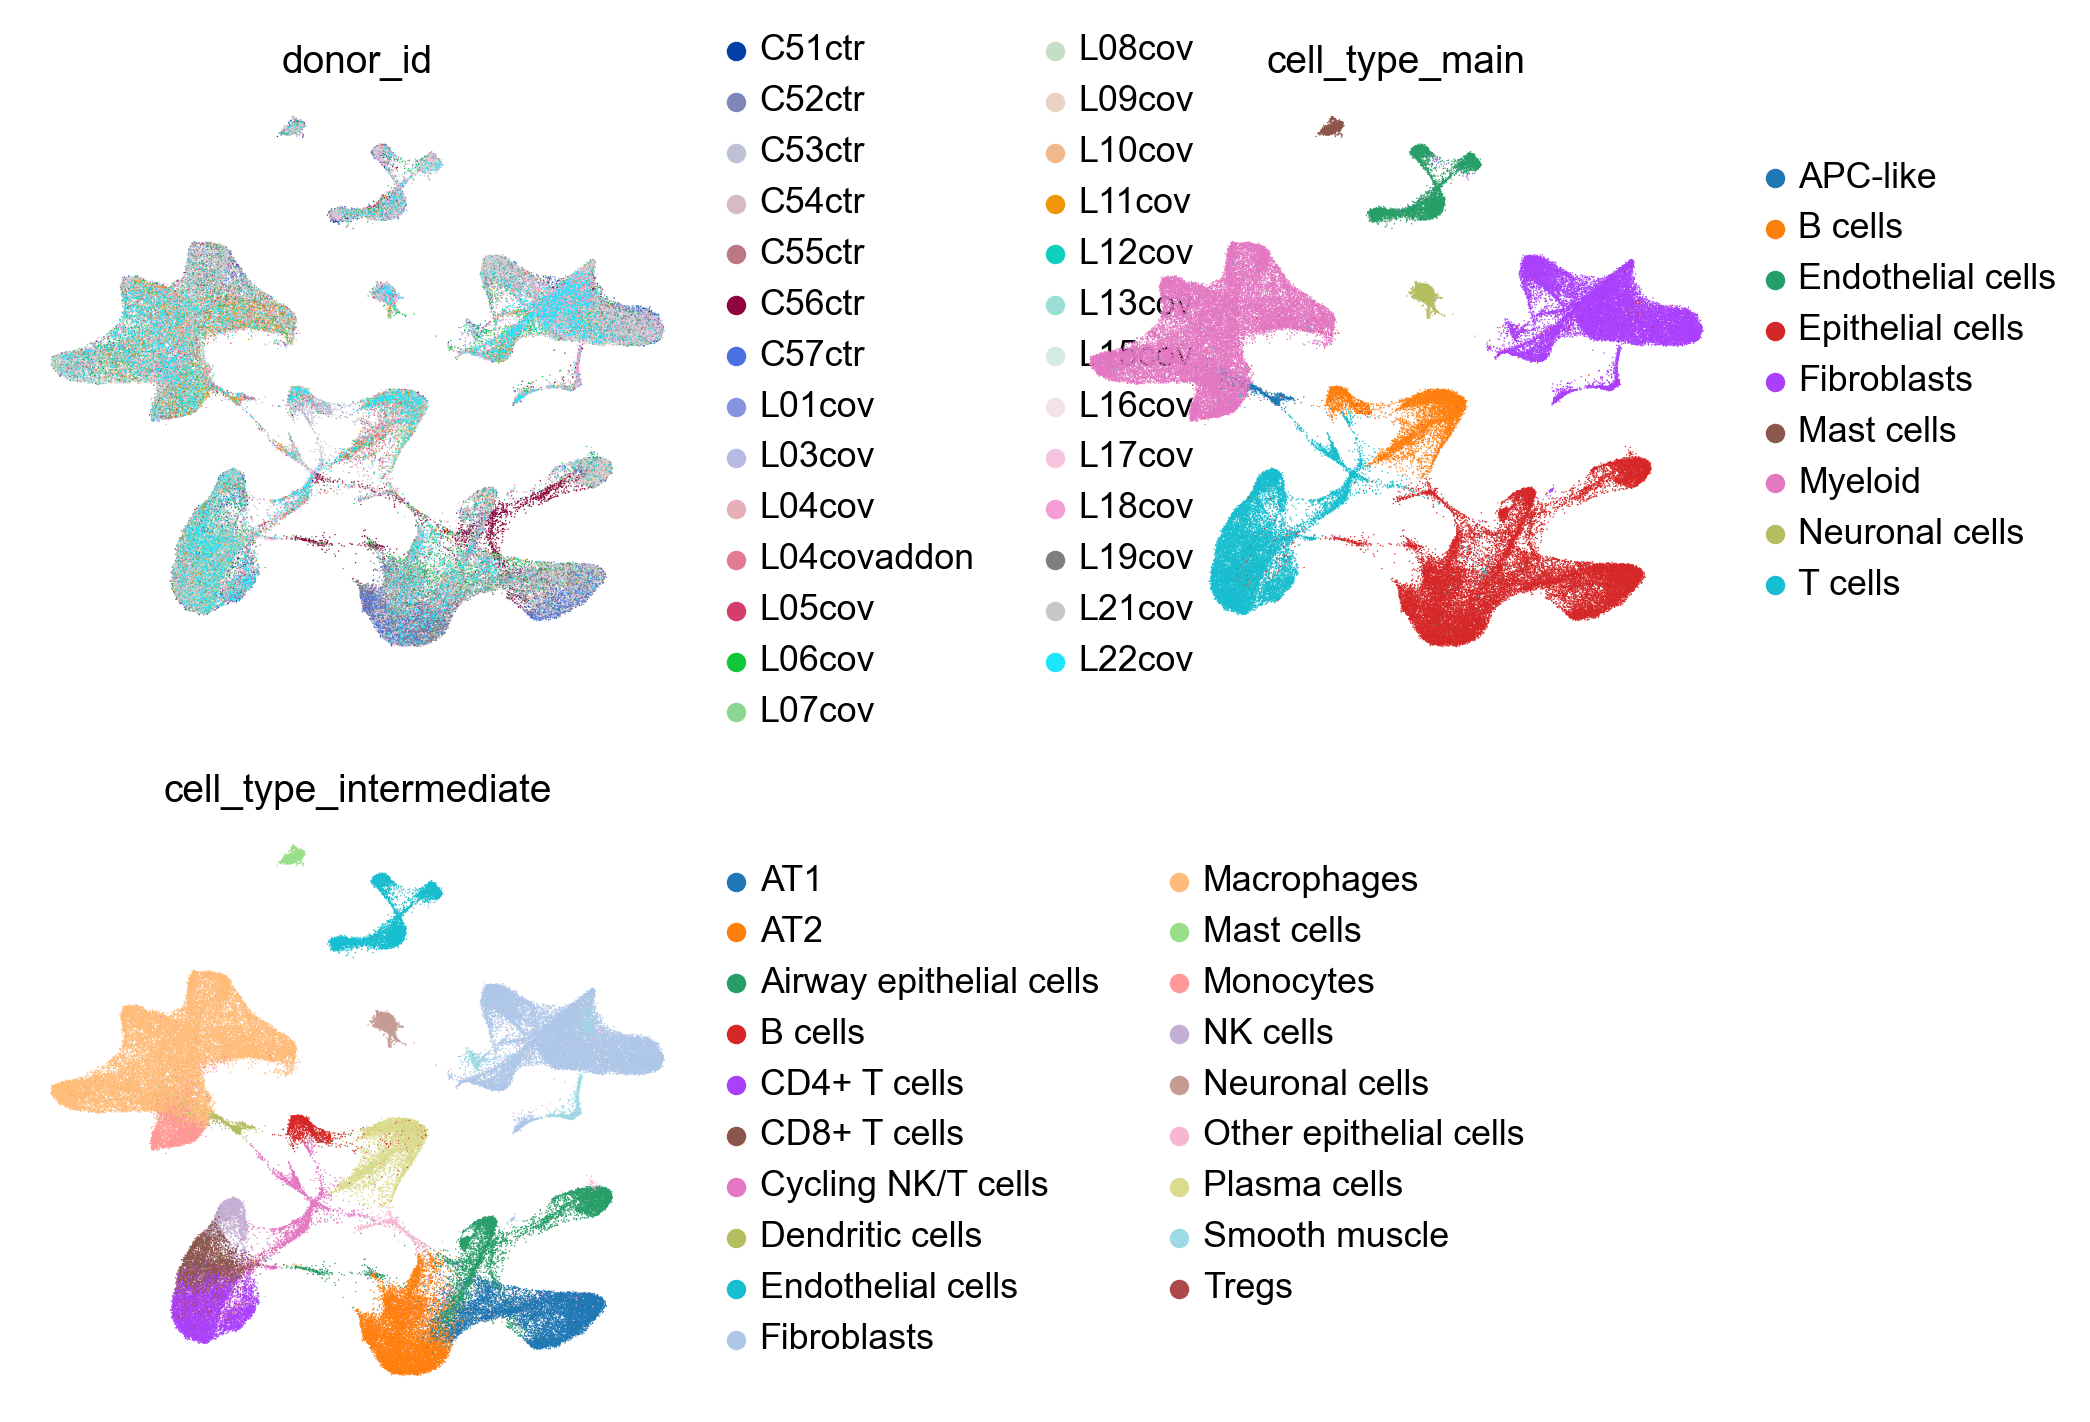

In [22]:
sc.pl.umap(adata, color=['donor_id', 'cell_type_main', 'cell_type_intermediate'], ncols=2, wspace=.4)

In [24]:
pd.crosstab(adata.obs.cell_type_main, adata.obs.cell_type_intermediate)

cell_type_intermediate   AT1    AT2  Airway epithelial cells  B cells  \
cell_type_main                                                          
APC-like                   0      0                        0        0   
B cells                    0      0                        0     1845   
Endothelial cells          0      0                        0        0   
Epithelial cells        9608  11341                     7332        0   
Fibroblasts                0      0                        0        0   
Mast cells                 0      0                        0        0   
Myeloid                    0      0                        0        0   
Neuronal cells             0      0                        0        0   
T cells                    0      0                        0        0   

cell_type_intermediate  CD4+ T cells  CD8+ T cells  Cycling NK/T cells  \
cell_type_main                                                           
APC-like                           0             0                   0   
B cells                            0             0                   0   
Endothelial cells                  0             0                   0   
Epithelial cells                   0             0                   0   
Fibroblasts                        0             0                   0   
Mast cells                         0             0                   0   
Myeloid                            0             0                   0   
Neuronal cells                     0             0                   0   
T cells                         7586          3561                2814   

cell_type_intermediate  Dendritic cells  Endothelial cells  Fibroblasts  \
cell_type_main                                                            
APC-like                            821                  0            0   
B cells                               0                  0            0   
Endothelial cells                     0               5386            0   
Epithelial cells                      0                  0            0   
Fibroblasts                           0                  0        21472   
Mast cells                           17                  0            0   
Myeloid                             245                  0            0   
Neuronal cells                        0                  0            0   
T cells                               0                  0            0   

cell_type_intermediate  Macrophages  Mast cells  Monocytes  NK cells  \
cell_type_main                                                         
APC-like                         23           0          5         0   
B cells                           0           0          0         0   
Endothelial cells                 0           0          0         0   
Epithelial cells                  0           0          0         0   
Fibroblasts                       0           0          0         0   
Mast cells                        9        1437          1         0   
Myeloid                       25928           1       3458         0   
Neuronal cells                    0           0          0         0   
T cells                           0           0          0      2141   

cell_type_intermediate  Neuronal cells  Other epithelial cells  Plasma cells  \
cell_type_main                                                                 
APC-like                             0                       0             0   
B cells                              0                       0          5391   
Endothelial cells                    0                       0             0   
Epithelial cells                     0                    1788             0   
Fibroblasts                          0                       0             0   
Mast cells                           0                       0             0   
Myeloid                              0                       0             0   
Neuronal cells                    2017    

In [23]:
adata[adata.obs.cell_type_main.isin(['APC-like', 'Endothelial cells', 'Epithelial cells'])].obs.cell_type_intermediate.value_counts()

AT2                        11341
AT1                         9608
Airway epithelial cells     7332
Endothelial cells           5386
Other epithelial cells      1788
Dendritic cells              821
Macrophages                   23
Monocytes                      5
Name: cell_type_intermediate, dtype: int64